In [8]:
import pandas as pd
import seaborn as sns

# Load the dataset
df = pd.read_csv('C:/Users/Mariam Usman/Downloads/ifood_df.csv')
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [9]:
df

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,46,709,43,182,42,118,247,...,0,0,0,0,1,0,0,1094,847,0
2201,64014.0,2,1,56,406,0,30,0,0,8,...,1,0,0,0,0,0,1,436,428,1
2202,56981.0,0,0,91,908,48,217,32,12,24,...,0,0,0,0,1,0,0,1217,1193,1
2203,69245.0,0,1,8,428,30,214,80,30,61,...,1,0,0,0,0,1,0,782,721,0


# DATA CLEANING

In [10]:
# check for missing values
print(df.isnull().sum())

# check for duplicates
print(df.duplicated().sum())

# drop duplicates
df.drop_duplicates(inplace=True)

# drop columns that are not needed
df = df.drop(['Z_CostContact', 'Z_Revenue'], axis=1)

# check the datatypes of the columns
print(df.dtypes)

# fix datatype issues
df['Kidhome'] = df['Kidhome'].astype('category')
df['Teenhome'] = df['Teenhome'].astype('category')

# check for outliers
# remove outliers if needed


Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

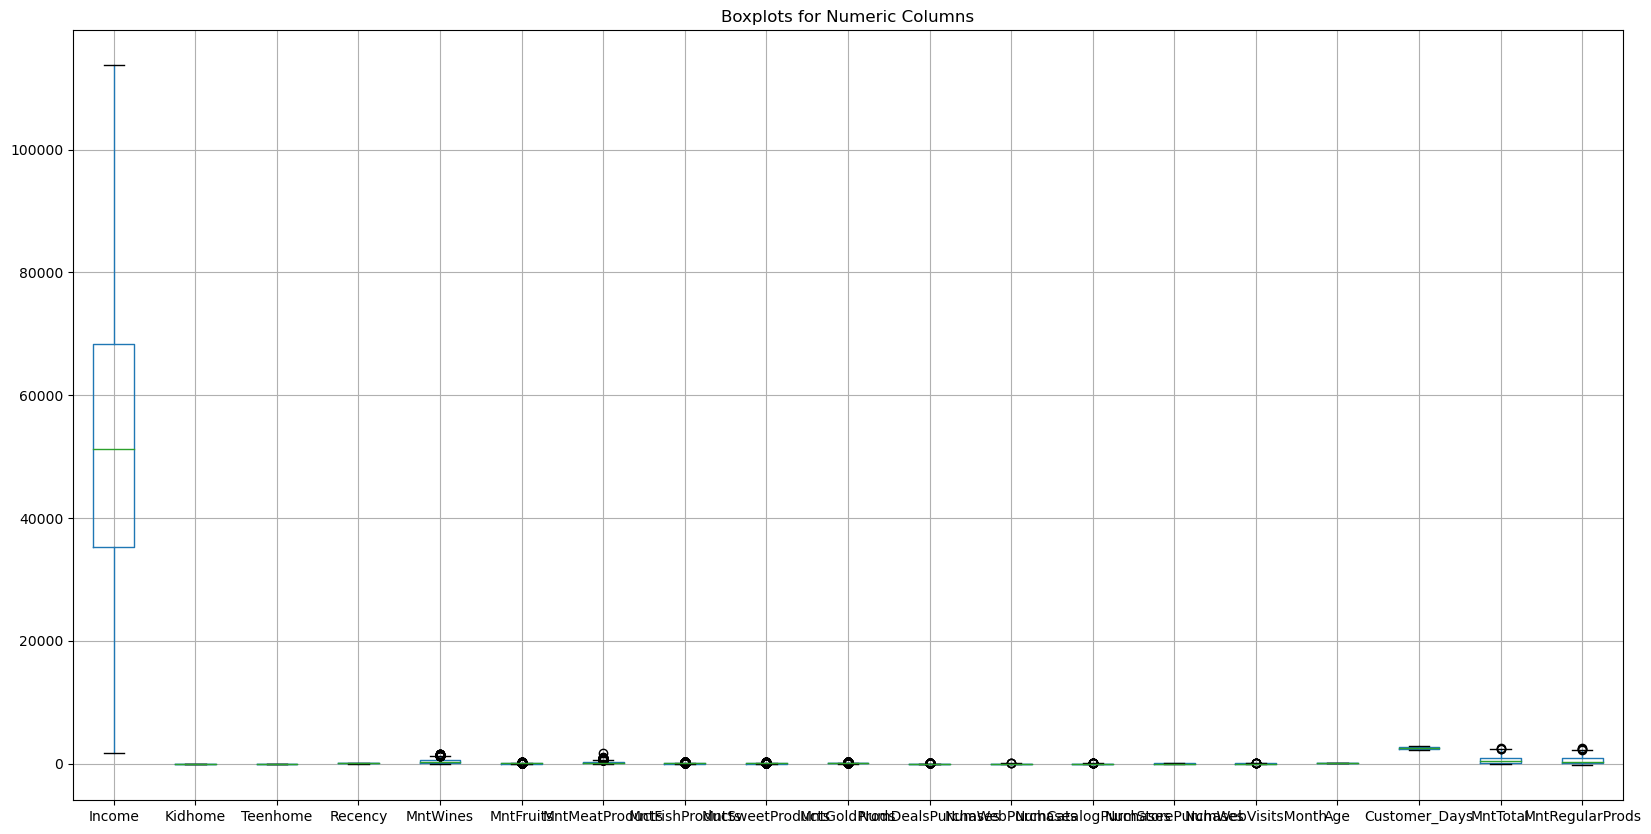

In [13]:
import matplotlib.pyplot as plt

customers = pd.read_csv('C:/Users/Mariam Usman/Downloads/ifood_df.csv')
# Create a list of columns with numerical data
num_cols = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 
            'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 
            'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Age', 'Customer_Days', 
            'MntTotal', 'MntRegularProds']

# Create a boxplot for each column to visualize any outliers
plt.figure(figsize=(20, 10))
customers[num_cols].boxplot()
plt.title('Boxplots for Numeric Columns')
plt.show()


In [15]:
#REMOVING OULITER USING INTERQUARTILE METHOD
# Calculate the IQR and upper and lower bounds
Q1 = np.percentile(customers['MntTotal'], 25)
Q3 = np.percentile(customers['MntTotal'], 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outliers
outliers = customers[(customers['MntTotal'] < lower_bound) | (customers['MntTotal'] > upper_bound)]

# Remove the outliers
outliers_removed = customers[(customers['MntTotal'] >= lower_bound) & (customers['MntTotal'] <= upper_bound)]



# EXPLORATORY DATA ANALYSIS

In [17]:
# create a dictionary to map the product names to their respective columns
product_map = {
    'Wines': 'MntWines',
    'Fruits': 'MntFruits',
    'MeatProducts': 'MntMeatProducts',
    'FishProducts': 'MntFishProducts',
    'SweetProducts': 'MntSweetProducts',
    'GoldProds': 'MntGoldProds'
}

# group the dataframe by customer and sum the purchases for each product
grouped = df.groupby('Customer_Days').agg({
    product_map['Wines']: 'sum',
    product_map['Fruits']: 'sum',
    product_map['MeatProducts']: 'sum',
    product_map['FishProducts']: 'sum',
    product_map['SweetProducts']: 'sum',
    product_map['GoldProds']: 'sum'
})

# sort the dataframe by the most purchased product
grouped = grouped.sort_values(by=list(product_map.values()), ascending=False)

# print the top 3 products for each customer
for index, row in grouped.iterrows():
    top_products = row.sort_values(ascending=False)[:3]
    top_products_str = ', '.join(top_products.index)
    print(f"Customer {index} prefers: {top_products_str}")


Customer 2562 prefers: MntWines, MntMeatProducts, MntSweetProducts
Customer 2693 prefers: MntWines, MntMeatProducts, MntFruits
Customer 2826 prefers: MntWines, MntMeatProducts, MntGoldProds
Customer 2795 prefers: MntWines, MntMeatProducts, MntGoldProds
Customer 2814 prefers: MntWines, MntMeatProducts, MntGoldProds
Customer 2845 prefers: MntWines, MntMeatProducts, MntFruits
Customer 2742 prefers: MntWines, MntMeatProducts, MntFishProducts
Customer 2782 prefers: MntWines, MntMeatProducts, MntFruits
Customer 2642 prefers: MntWines, MntMeatProducts, MntGoldProds
Customer 2651 prefers: MntWines, MntMeatProducts, MntFishProducts
Customer 2593 prefers: MntWines, MntMeatProducts, MntGoldProds
Customer 2485 prefers: MntWines, MntMeatProducts, MntFishProducts
Customer 2615 prefers: MntWines, MntMeatProducts, MntSweetProducts
Customer 2564 prefers: MntWines, MntMeatProducts, MntFishProducts
Customer 2657 prefers: MntWines, MntMeatProducts, MntGoldProds
Customer 2196 prefers: MntWines, MntMeatProd

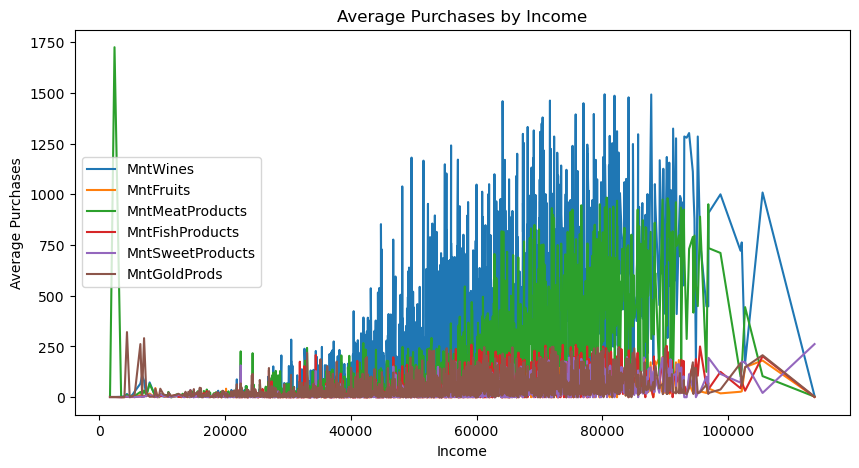

In [3]:
# Customers with higher income tend to make more purchases across all product categories:

import matplotlib.pyplot as plt

# Group customers by income and calculate the mean purchases for each product category
grouped = df.groupby('Income')[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean()

# Plot the results
grouped.plot(figsize=(10, 5))
plt.title('Average Purchases by Income')
plt.xlabel('Income')
plt.ylabel('Average Purchases')
plt.show()

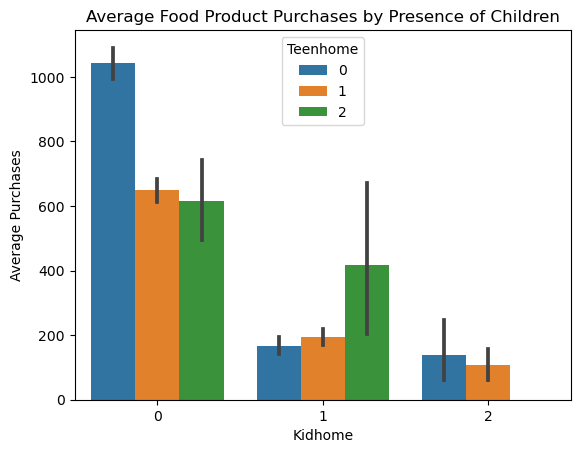

In [5]:
# Customers with children tend to purchase more food products:
import seaborn as sns
import numpy as np

# Create a barplot of average food product purchases by presence of children
sns.barplot(x='Kidhome', y='MntTotal', hue='Teenhome', data=df, estimator=np.mean)
plt.title('Average Food Product Purchases by Presence of Children')
plt.xlabel('Kidhome')
plt.ylabel('Average Purchases')
plt.show()

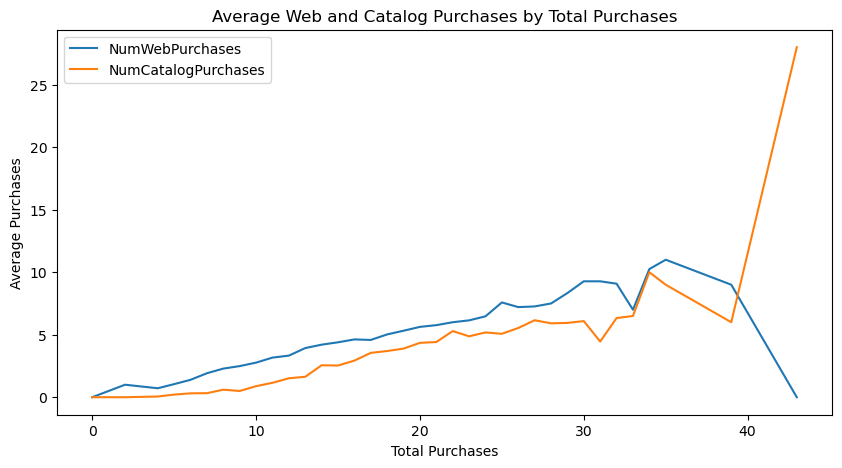

In [6]:
# Customers who have made more web and catalog purchases tend to have made more overall purchases:
# Calculate the total number of purchases for each customer
df['TotalPurchases'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

# Group customers by total purchases and calculate the mean web and catalog purchases for each group
grouped = df.groupby('TotalPurchases')[['NumWebPurchases', 'NumCatalogPurchases']].mean()

# Plot the results
grouped.plot(figsize=(10, 5))
plt.title('Average Web and Catalog Purchases by Total Purchases')
plt.xlabel('Total Purchases')
plt.ylabel('Average Purchases')
plt.show()


In [7]:
# Customers who have complained in the past are less likely to respond to marketing campaigns:
# Calculate the response rate for customers who have complained in the past
response_rate_complainers = df[df['Complain'] == 1]['Response'].mean()

# Calculate the response rate for customers who have not complained in the past
response_rate_non_complainers = df[df['Complain'] == 0]['Response'].mean()

# Print the results
print('Response rate for customers who have complained: {:.2%}'.format(response_rate_complainers))
print('Response rate for customers who have not complained: {:.2%}'.format(response_rate_non_complainers))


Response rate for customers who have complained: 15.00%
Response rate for customers who have not complained: 15.10%


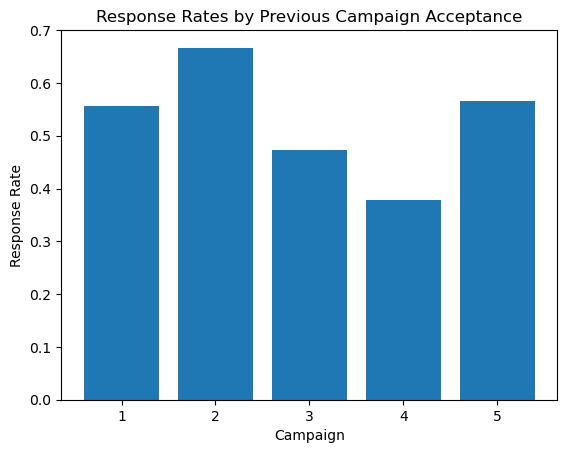

In [8]:
# Customers who have accepted previous marketing campaigns are more likely to respond to future campaigns
# Calculate the response rate for customers who have accepted each marketing campaign
response_rates = []
for i in range(1, 6):
    response_rate = df[df['AcceptedCmp{}'.format(i)] == 1]['Response'].mean()
    response_rates.append(response_rate)

# Plot the results
plt.bar(x=[1, 2, 3, 4, 5], height=response_rates)
plt.title('Response Rates by Previous Campaign Acceptance')
plt.xlabel('Campaign')
plt.ylabel('Response Rate')
plt.show()


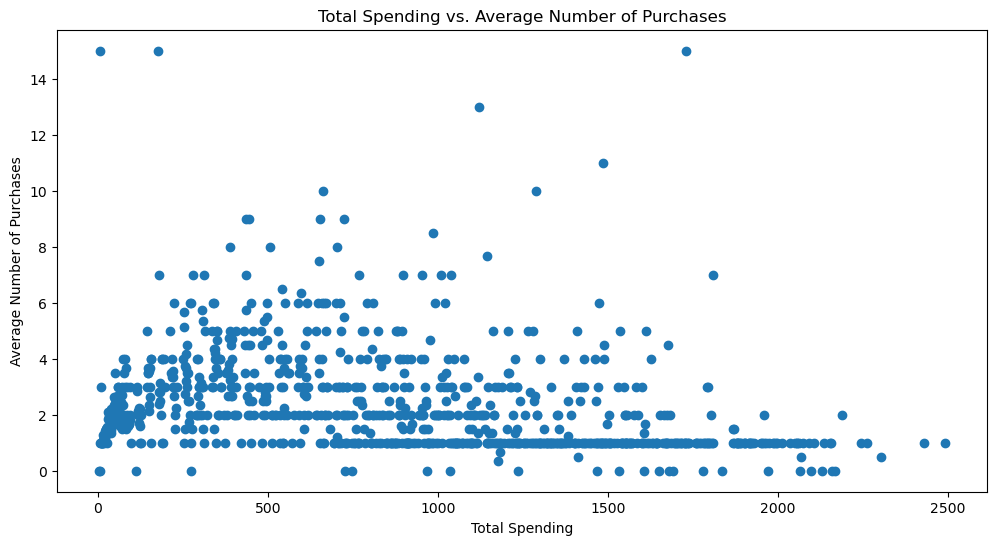

In [16]:
# Group customers by their total amount spent on all products
grouped_by_spending = customers.groupby('MntTotal')

# Calculate the average number of purchases for each spending group
avg_purchases_by_spending = grouped_by_spending['NumDealsPurchases'].mean()

# Create a scatter plot of total spending vs. average number of purchases
plt.figure(figsize=(12,6))
plt.scatter(grouped_by_spending.sum().index, avg_purchases_by_spending)
plt.title('Total Spending vs. Average Number of Purchases')
plt.xlabel('Total Spending')
plt.ylabel('Average Number of Purchases')
plt.show()


Median income: 51287.0
Mean income: 51622.0947845805


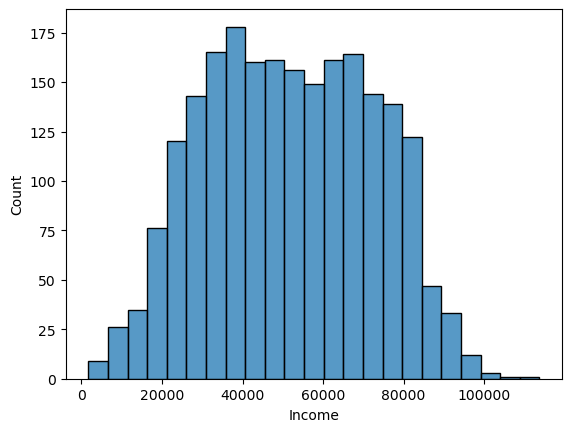

In [5]:
# Explore income distribution
sns.histplot(df['Income'])
print('Median income:', df['Income'].median())
print('Mean income:', df['Income'].mean())



<AxesSubplot:xlabel='Teenhome', ylabel='MntFruits'>

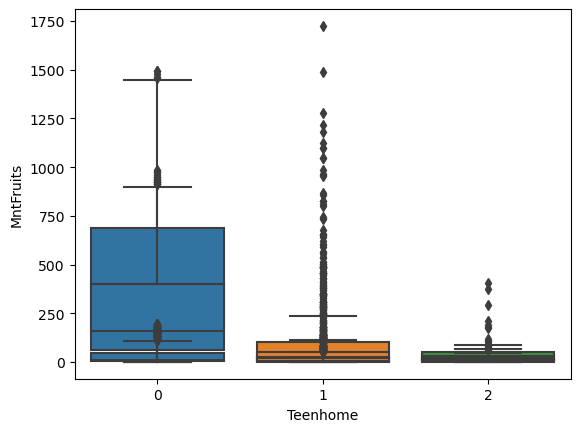

In [18]:
# Explore spending behavior based on number of kids and teenagers
sns.boxplot(x='Kidhome', y='MntWines', data=df)
sns.boxplot(x='Kidhome', y='MntMeatProducts', data=df)
sns.boxplot(x='Teenhome', y='MntFruits', data=df)
sns.boxplot(x='Teenhome', y='MntSweetProducts', data=df)



<AxesSubplot:xlabel='AcceptedCmpOverall', ylabel='MntTotal'>

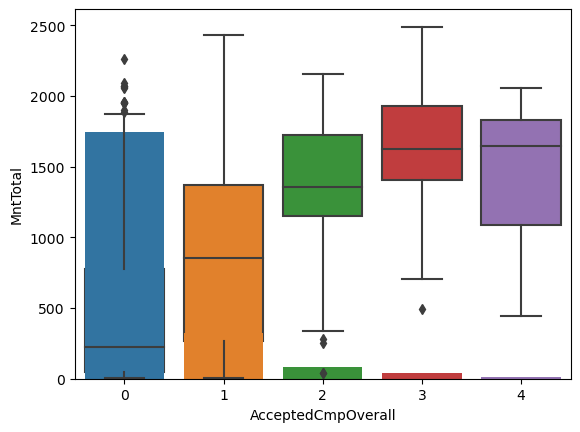

In [7]:
# Explore the impact of marketing campaigns
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
df['AcceptedCmpOverall'] = df[campaign_cols].sum(axis=1)
sns.countplot(x='AcceptedCmpOverall', data=df)
sns.boxplot(x='AcceptedCmpOverall', y='MntTotal', data=df)



In [19]:
# Create a dictionary to store the product names and their total quantity
product_totals = {'Wines': sum(customers['MntWines']),
                  'Fruits': sum(customers['MntFruits']),
                  'Meat Products': sum(customers['MntMeatProducts']),
                  'Fish Products': sum(customers['MntFishProducts']),
                  'Sweet Products': sum(customers['MntSweetProducts']),
                  'Gold Products': sum(customers['MntGoldProds'])}

# Sort the products by their total quantity in descending order
sorted_products = sorted(product_totals.items(), key=lambda x: x[1], reverse=True)

# Print the top 3 products by total quantity
print(f"The top 3 most purchased products are: {sorted_products[0][0]}, {sorted_products[1][0]}, and {sorted_products[2][0]}.")


The top 3 most purchased products are: Wines, Meat Products, and Gold Products.


In [21]:
# Group customers by their values for Kidhome and Teenhome, and calculate the mean of their Incomes
avg_income_by_kidteen = customers.groupby(['Kidhome', 'Teenhome'])['Income'].mean()

# Display the results
print(avg_income_by_kidteen)


Kidhome  Teenhome
0        0           65094.417197
         1           57834.878641
         2           57085.166667
1        0           33350.801619
         1           43738.605978
         2           53377.857143
2        0           34586.000000
         1           41824.655172
Name: Income, dtype: float64


In [23]:
# Find the most selling products
product_counts = customers.iloc[:, 10:15].sum().sort_values(ascending=False)

# Print the result
print("Most selling products:\n")
print(product_counts.head())


Most selling products:

NumStorePurchases      12841
NumWebVisitsMonth      11768
NumWebPurchases         9042
NumCatalogPurchases     5833
NumDealsPurchases       5112
dtype: int64
